<a href="https://colab.research.google.com/github/ayoub4145/Cost-Medical-predictions/blob/main/Cost_Medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('insurance.csv')

#comprendre les données
print(df.head())
print(df.info())
print(df.describe())  # Voir min, max, moyenne des valeurs cibles
#pas de valeurs manquantes
df['age']
df['charges']
df['region']

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [ ]:
df.shape

(1338, 7)

# Détection des valeurs aberrantes

1) Visuellement

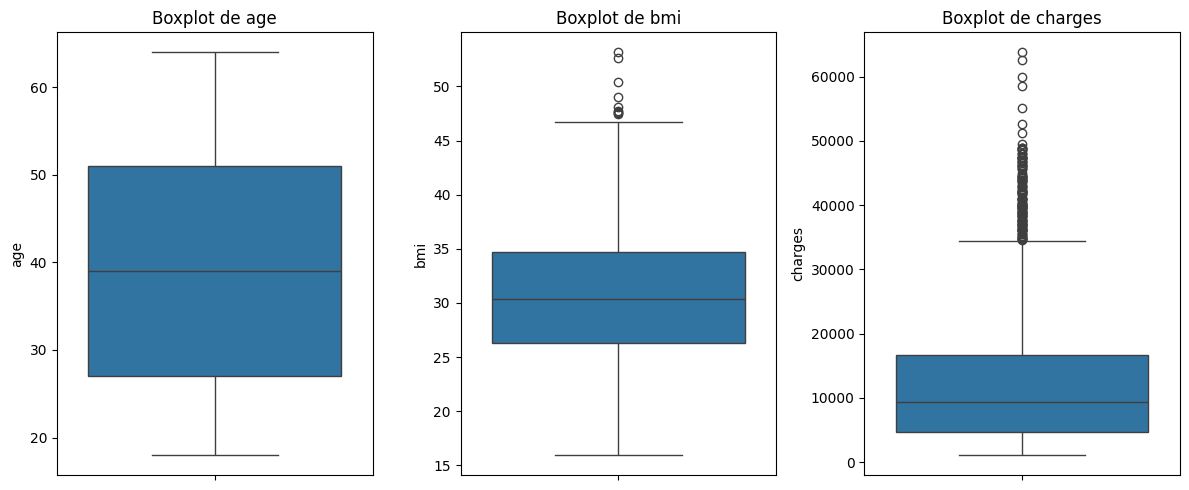

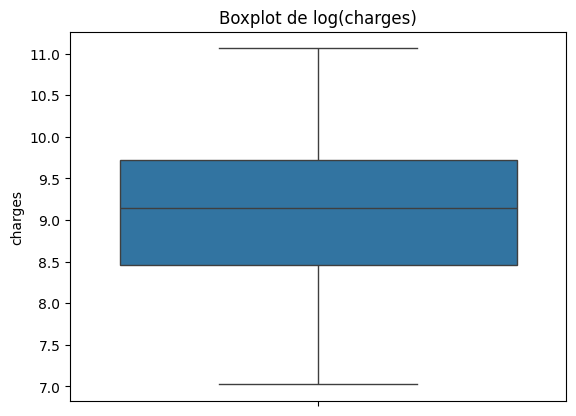

In [ ]:
# Sélectionner les colonnes numériques
colonnes_num = ["age","bmi","charges"]
#visualiser les valeurs aberrantes
plt.figure(figsize=(12, 5))
for i, col in enumerate(colonnes_num):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

#charges a des valeurs très élevées qui faussaient la détection des outliers.
#En appliquant log(charges), on réduit l’écart entre les valeurs extrêmes et la médiane,
# rendant les données plus symétriques et faciles à analyser.
df['charges']=np.log1p(df['charges'])
sns.boxplot(y=df["charges"])
plt.title("Boxplot de log(charges)")
plt.show()
#on a des valeurs aberrantes dans bmi et charges, on doit les standariser

2) Détection des valeurs aberrantes en utilisant z-score

In [ ]:
def detect_outliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)

  return outliers

In [ ]:
print(f"La listes des outliers dans : charges{detect_outliers(df['charges'])}")
print(f"La listes des outliers dans : bmi{detect_outliers(df['bmi'])}")

La listes des outliers dans : charges[]
La listes des outliers dans : bmi[49.06, 50.38, 52.58, 53.13]


# Standarisation des valeurs aberrantes et les mettre sous la même échelle

In [ ]:
#mettre toutes les variables sur la meme echelle (moyenne=0, ecart-type=1)

from sklearn.preprocessing import StandardScaler,MinMaxScaler
Y=df["charges"]
scaler = StandardScaler()
df[["bmi","charges"]]=scaler.fit_transform(df[["bmi","charges"]])
scaler_y = MinMaxScaler()
Y = scaler_y.fit_transform(Y.values.reshape(-1, 1)).flatten()
print(df.head())
print(df.describe())
print(df['charges'])

   age     sex       bmi  children smoker     region   charges
0   19  female -0.453320         0    yes  southwest  0.691385
1   18    male  0.509621         1     no  southeast -1.789861
2   28    male  0.383307         3     no  southeast -0.759562
3   33    male -1.305531         0     no  northwest  0.978536
4   32    male -0.292556         0     no  northwest -0.912231
               age           bmi     children       charges
count  1338.000000  1.338000e+03  1338.000000  1.338000e+03
mean     39.207025 -2.124194e-16     1.094918  1.404623e-15
std      14.049960  1.000374e+00     1.205493  1.000374e+00
min      18.000000 -2.412011e+00     0.000000 -2.257999e+00
25%      27.000000 -7.164063e-01     0.000000 -6.906853e-01
50%      39.000000 -4.320880e-02     1.000000  5.204397e-02
75%      51.000000  6.611572e-01     2.000000  6.754797e-01
max      64.000000  3.685522e+00     5.000000  2.137276e+00
0       0.691385
1      -1.789861
2      -0.759562
3       0.978536
4      -0.9122


# Analyse des relations entre les variables


* Répartition des charges médicales par région

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64


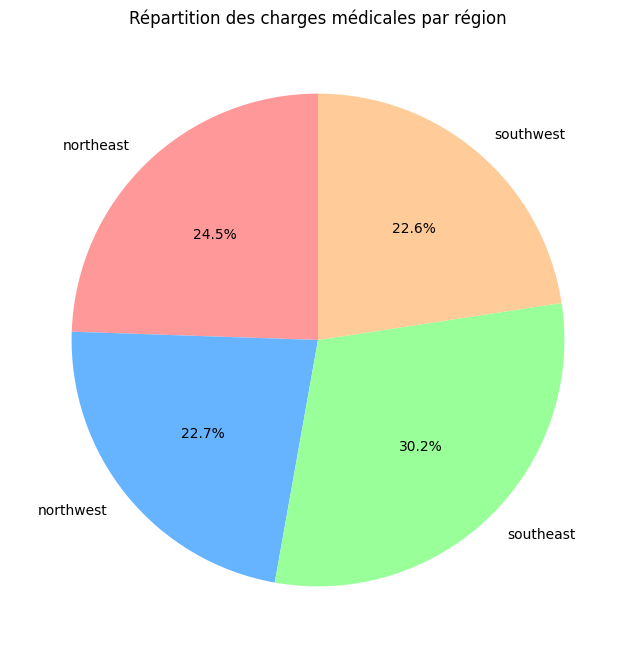

In [5]:
#df.info()
# Somme des charges par région
charges_par_region = df.groupby("region")["charges"].sum()
print(charges_par_region)
# Création du pie chart
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.pie(charges_par_region, labels=charges_par_region.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Répartition des charges médicales par région")

plt.show()


# Encodage des données qualitatives

In [ ]:
print(df['sex'].head(10))  
print(df['smoker'].head(10))   

#on doit en premier lieu convertir les colonnes objet en numérique
# Encodage binaire pour sex et smoker
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
# Encodage One-Hot pour region
df = pd.get_dummies(df, columns=['region'], drop_first=True)
#drop_first=true pour éviter la multicolinéarité
df.head()

0    female
1      male
2      male
3      male
4      male
5    female
6    female
7    female
8      male
9    female
Name: sex, dtype: object
0    yes
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9     no
Name: smoker, dtype: object


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,-0.453320,0,1,0.691385,False,False,True
1,18,0,0.509621,1,0,-1.789861,False,True,False
2,28,0,0.383307,3,0,-0.759562,False,True,False
3,33,0,-1.305531,0,0,0.978536,True,False,False
4,32,0,-0.292556,0,0,-0.912231,True,False,False


# Encodage des données qualitatives

In [6]:
print(df['sex'].head(10))  
print(df['smoker'].head(10))   

#on doit en premier lieu convertir les colonnes objet en numérique
# Encodage binaire pour sex et smoker
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
# Encodage One-Hot pour region
#df = pd.get_dummies(df, columns=['region'], drop_first=True)
#drop_first=true pour éviter la multicolinéarité
df.head()

0    female
1      male
2      male
3      male
4      male
5    female
6    female
7    female
8      male
9    female
Name: sex, dtype: object
0    yes
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9     no
Name: smoker, dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


# Matrice de corrélation

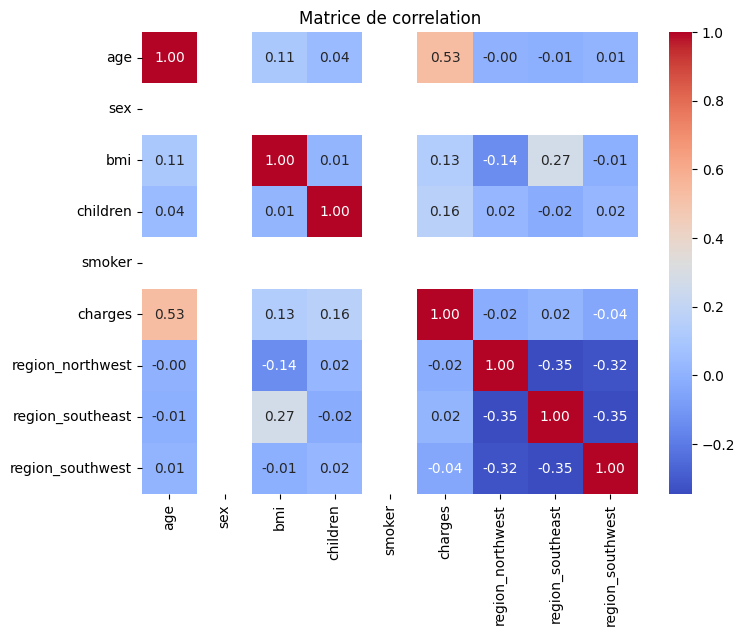

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de correlation")
plt.show()

#on remarque que les variables qui sont fortement corrélé avec log_charges sont age et smoker
#ce qui n'ont presque pas d'influence sont sex et region
#une influence modérée pour bmi


Relation entre BMI et Charges médicales

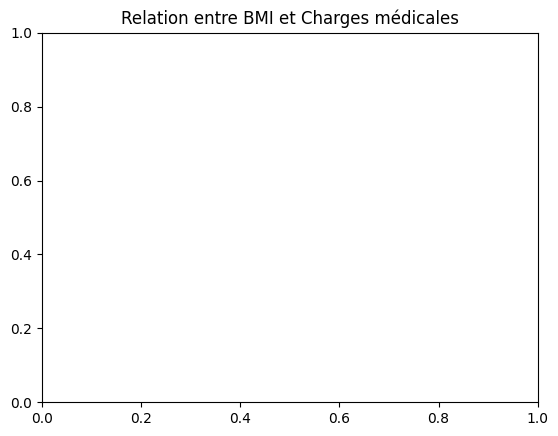

In [ ]:
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["smoker"])
plt.title("Relation entre BMI et Charges médicales")
plt.show()
#la relation entre bmi et charges n'est pas linéaire, pas de direct influence
#les fumeurs ont des couts médicaxux tres eleves que les non fumeurs

Impact du tabagisme sur les charges médicaux

ValueError: List of boxplot statistics and `positions` values must have same the length

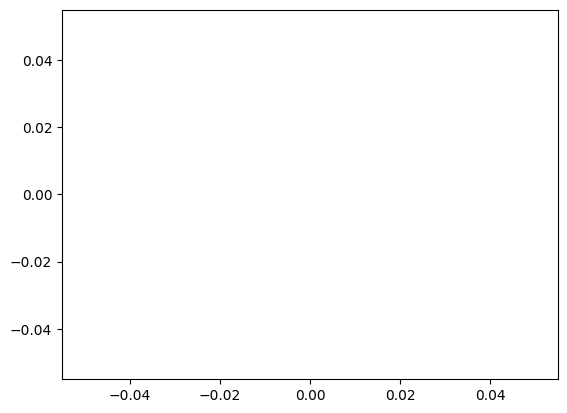

In [ ]:
sns.boxplot(x=df["smoker"],y=df["charges"])
plt.title("Impact du tabagisme sur les charges médicaux")
plt.show()
#on remarque un écart significatif entre les fumeurs et non fumeurs en termes des couts
#difference clairement visible sur la boite a moustache(boxplot)

relation entre age et charges medicales

In [ ]:
sns.scatterplot(x=df["age"], y=df["charges"])
plt.title("relation entre age et charges medicales")
plt.show()
#pour l'age on a une relation modérée mais significative, puisque la plupart des points ont une relation linéaire avec les charges

df.columns


# Entraînement des modèles

1) Linear Regression

In [ ]:
#regression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df[["age","bmi","smoker"]]
Y=df["charges"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 80% for training, 20% for testing



model1 = LinearRegression()
model1.fit(X_train,Y_train)

#prediction
y_pred = model1.predict(X_test)

#tracage de la courbe
plt.scatter(Y_test, y_pred, color="blue", alpha=0.5)
plt.xlabel("Valeurs réelles (log_charges)")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#calcul des erreurs
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,y_pred)
print("-------------LinearRegression-----------------")
print(f"MSE = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R2 = {r2}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

model2=DecisionTreeRegressor(max_depth=4, random_state=42)

model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae=mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("-------------DecisionTreeRegressor-----------------")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2}")

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model2,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
from xgboost import XGBRegressor

# Initialisation du modèle
model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Entraînement
model3.fit(X_train, Y_train)

# Prédictions
y_pred = model3.predict(X_test)
#Graphe de regression pour le model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison Prédictions vs Réelles")
plt.legend(["Modèle", "45° Line"])
plt.show()

print("-------------XGBoostRegressor-----------------")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2}")